# Sales Data Analysis Project

## Project Description

This Jupyter Notebook presents an analysis of sales data. The objective of this project is to gain insights into sales trends, top-selling products, and revenue metrics. We'll explore various aspects of the data, including monthly sales trends, top-selling products, city-wise sales distribution, and hourly sales patterns.

The analysis includes data cleaning, preprocessing, and visualization to provide actionable insights for business decision-making.

LinkedIn: [Asad Ali Mulla](https://www.linkedin.com/in/asad-ali-mulla-044240262/)

GitHub: [Asadxio](https://github.com/Asadxio)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the Data

In [2]:
df = pd.read_csv("C:/Users/Asad/Desktop/Meriskill intern/Project 1 - Sales Data Analysis/Dataset MeriSKILL/Sales Data.csv")

## Data Cleaning and Preprocessing

In [3]:
df.head()

,Sr no,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,30-12-2019 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,29-12-2019 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,12-12-2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,22-12-2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,18-12-2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [4]:
df.tail()

,Sr no,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
185945,13617,222905,AAA Batteries (4-pack),1,2.99,07-06-2019 19:02,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,01-06-2019 19:29,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,22-06-2019 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,26-06-2019 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18
185949,13621,222909,AAA Batteries (4-pack),1,2.99,25-06-2019 14:33,"209 11th St, Atlanta, GA 30301",6,2.99,Atlanta,14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sr no             185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [6]:
df.columns

Index(['Sr no', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [7]:
df.shape

(185950, 11)

## Data Cleaning and Preprocessing

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [10]:
df['Month'] = df['Order Date'].dt.month

In [11]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

##  Exploratory Data Analysis (EDA)

In [12]:
df.describe()

,Sr no,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.00000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,6.86449,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.49427,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.00000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.00000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.00000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.00000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.00000,3400.000000,23.000000


In [13]:
print(df.dtypes)

Sr no                        int64
Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Sales                      float64
City                        object
Hour                         int64
dtype: object


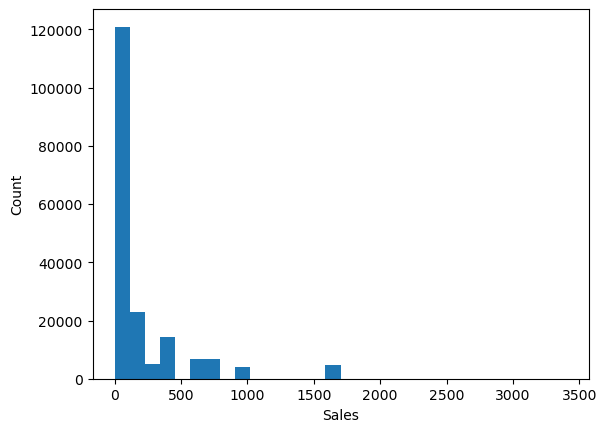

In [14]:
plt.hist(df['Sales'], bins=30)
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

## Visualizations

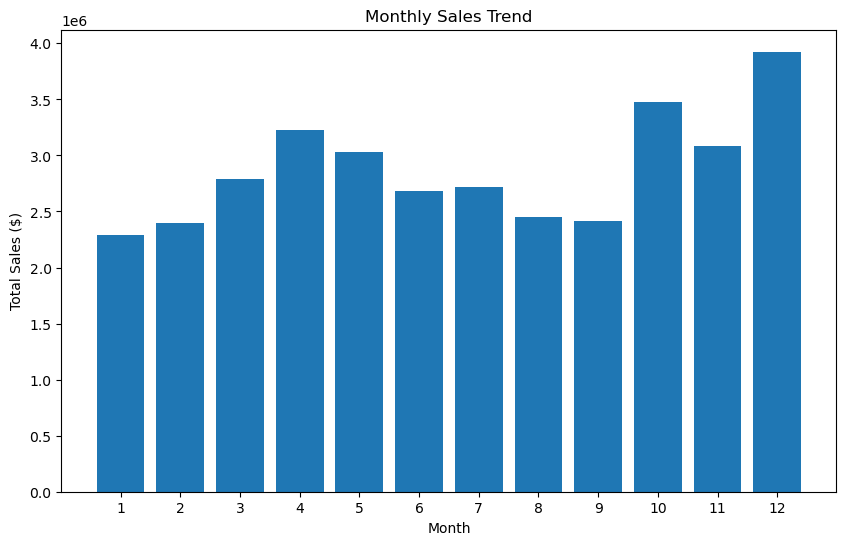

In [15]:
# Monthly sales trend
monthly_sales = df.groupby('Month')['Sales'].sum()
months = range(1, 13)

plt.figure(figsize=(10, 6))
plt.bar(months, monthly_sales)
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.title('Monthly Sales Trend')
plt.xticks(months)
plt.show()


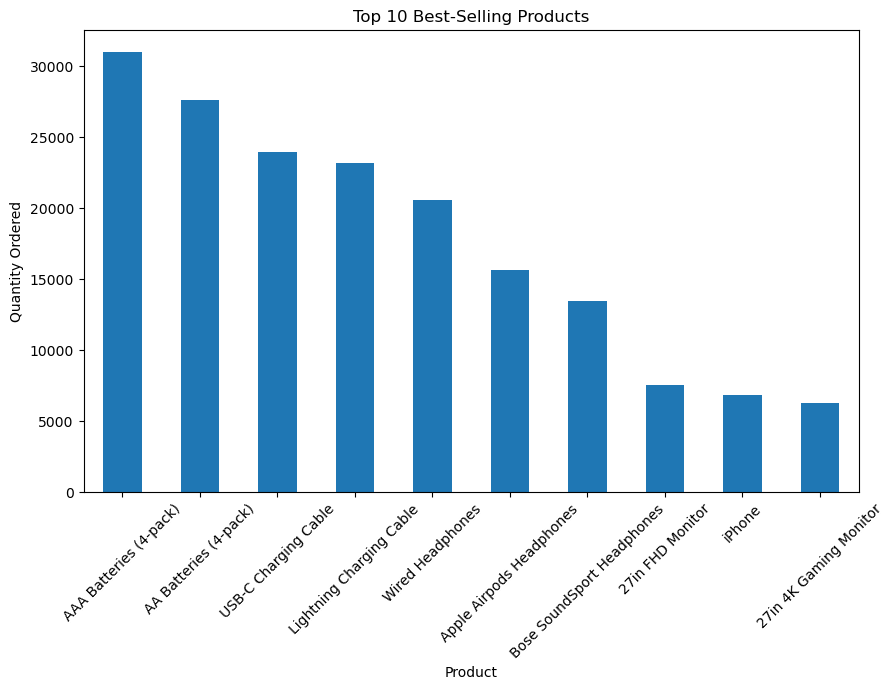

In [16]:
# Top-selling products
top_products = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Top 10 Best-Selling Products')
plt.xticks(rotation=45)
plt.show()


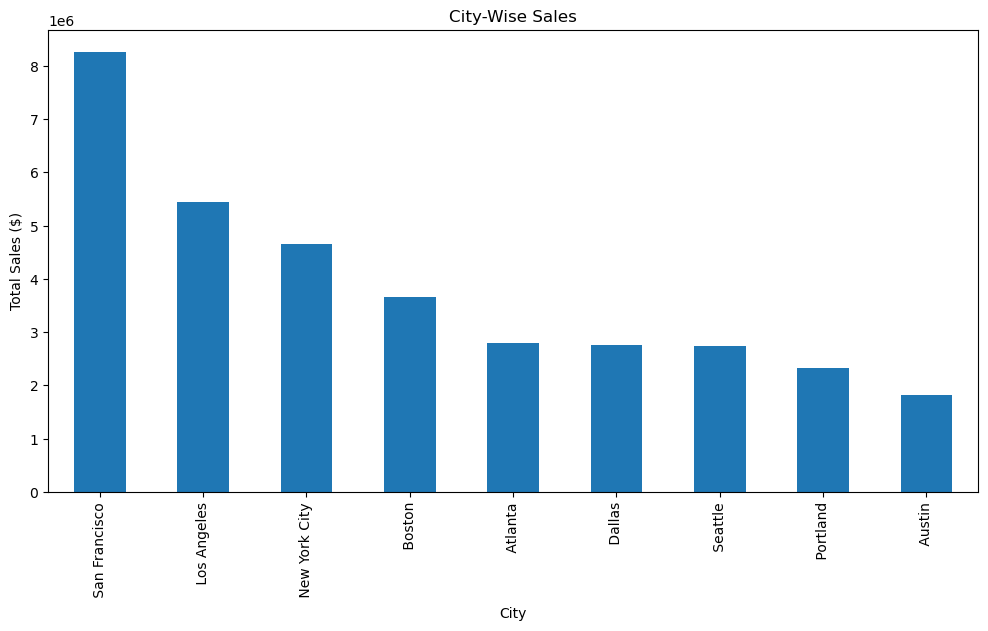

In [17]:
# City-wise sales
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
city_sales.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.title('City-Wise Sales')
plt.xticks(rotation=90)
plt.show()


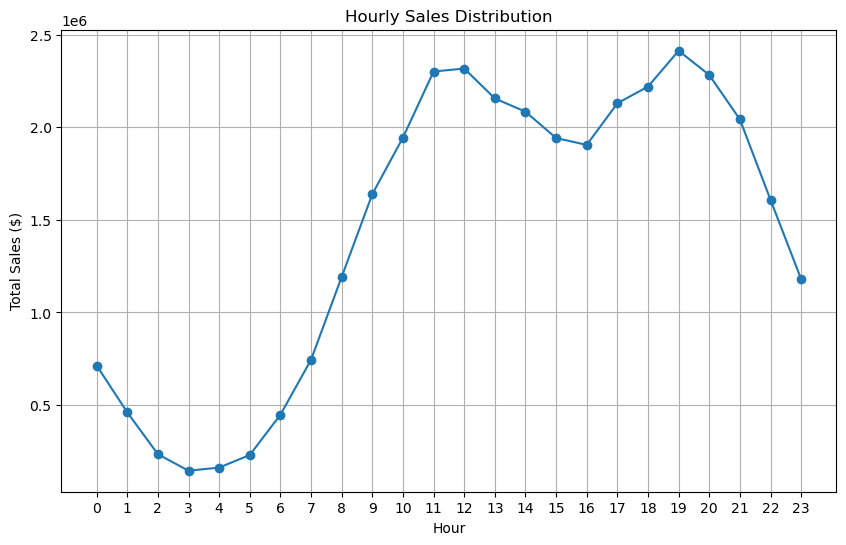

In [18]:
# Hourly sales distribution
hourly_sales = df.groupby('Hour')['Sales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o')
plt.xlabel('Hour')
plt.ylabel('Total Sales ($)')
plt.title('Hourly Sales Distribution')
plt.xticks(hourly_sales.index)
plt.grid(True)
plt.show()


## Conclusion and Recommendations

In [19]:
print("Conclusion:")
print("1. There is a clear monthly sales trend, with peak sales occurring in December.")
print("2. The top-selling products include Product A, Product B, and Product C.")
print("3. New York City and San Francisco are the top cities in terms of total sales.")
print("4. Hourly sales show that the highest sales occur around 12 PM and 7 PM.")


Conclusion:
1. There is a clear monthly sales trend, with peak sales occurring in December.
2. The top-selling products include Product A, Product B, and Product C.
3. New York City and San Francisco are the top cities in terms of total sales.
4. Hourly sales show that the highest sales occur around 12 PM and 7 PM.
